In [140]:
import pandas as pd

In [212]:
# read in merged csvs
path = "gaze_agent_merged/"
data = {}

for i in range(1,36):
    if i not in [11, 24, 26, 32, 34]:
        if i<10:
            participant="P0"+str(i)
        else:
            participant="P"+str(i)
            data[participant]={}
        # add dict entry
        data[participant]={}
        data[participant]["000"]=pd.read_csv(path+participant+"_000_merged.csv")
        data[participant]["001"]=pd.read_csv(path+participant+"_001_merged.csv")
    

In [213]:
# check if all 30 are read in
print(len(data), "files were loaded")

30 files were loaded


In [217]:
# sanity check
data["P12"]["001"].head()

,Unnamed: 0,norm_pos_x,norm_pos_y,Human x,Human y,Agent x,Agent y,Frame number,gaze_to_human,gaze_to_ai,Gaze_focus,Condition
0,11,505.615232,283.970237,625.0,402,499.0,412,11,167.880159,128.200552,Env,TODO
1,12,507.056026,280.996536,625.0,402,514.0,402,12,168.975203,121.202545,Env,TODO
2,13,508.134285,277.780849,626.5,400,556.0,398,13,170.141011,129.397724,Env,TODO
3,14,511.273463,288.819167,626.5,400,559.0,398,14,160.119744,119.156522,Env,TODO
4,15,525.318944,438.178821,628.0,403,562.0,398,15,108.540079,54.404389,Env,TODO


# Frame Counts 

In [218]:
counters={"lvl1":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}},
          "lvl2":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}}
         }


In [219]:
for p in data:
    print(p)
    # add counts for lvl1
    counters["lvl1"]["Gaze"]["AI"]+=(data[p]["000"].Gaze_focus == 'AI').sum()
    counters["lvl1"]["Gaze"]["Human"]+=(data[p]["000"].Gaze_focus == 'Human').sum()
    counters["lvl1"]["Gaze"]["Env"]+=(data[p]["000"].Gaze_focus == 'Env').sum()
    counters["lvl1"]["Condition"]["Error"]+=(data[p]["000"].Condition == 'Error').sum()
    counters["lvl1"]["Condition"]["Confusion"]+=(data[p]["000"].Condition == 'Confusion').sum()
    counters["lvl1"]["Condition"]["Normal"]+=(data[p]["000"].Condition == 'Normal').sum()
    
    # add counts for lvl2
    counters["lvl2"]["Gaze"]["AI"]+=(data[p]["001"].Gaze_focus == 'AI').sum()
    counters["lvl2"]["Gaze"]["Human"]+=(data[p]["001"].Gaze_focus == 'Human').sum()
    counters["lvl2"]["Gaze"]["Env"]+=(data[p]["001"].Gaze_focus == 'Env').sum()
    counters["lvl2"]["Condition"]["Error"]+=(data[p]["001"].Condition == 'Error').sum()
    counters["lvl2"]["Condition"]["Confusion"]+=(data[p]["001"].Condition == 'Confusion').sum()
    counters["lvl2"]["Condition"]["Normal"]+=(data[p]["001"].Condition == 'Normal').sum()
    
counters    

P01
P02
P03
P04
P05
P06
P07
P08
P09
P10
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P22
P23
P25
P27
P28
P29
P30
P31
P33
P35


{'lvl1': {'Gaze': {'AI': 826, 'Human': 7152, 'Env': 23368},
  'Condition': {'Error': 0, 'Confusion': 0, 'Normal': 0}},
 'lvl2': {'Gaze': {'AI': 2172, 'Human': 6908, 'Env': 21516},
  'Condition': {'Error': 0, 'Confusion': 0, 'Normal': 0}}}

In [220]:
#counters={"lvl1":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}},
#          "lvl2":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}}
#         }
#
#for p in data:
#    print(p)
#    # add counts for lvl1
#    counters["lvl1"]["Gaze"]["AI"].append((data[p]["000"].Gaze_focus == 'AI').sum())
#    counters["lvl1"]["Gaze"]["Human"].append((data[p]["000"].Gaze_focus == 'Human').sum())
#    counters["lvl1"]["Gaze"]["Env"].append((data[p]["000"].Gaze_focus == 'Env').sum())
#    counters["lvl1"]["Condition"]["Error"].append((data[p]["000"].Condition == 'Error').sum())
#    counters["lvl1"]["Condition"]["Confusion"].append((data[p]["000"].Condition == 'Confusion').sum())
#    counters["lvl1"]["Condition"]["Normal"].append((data[p]["000"].Condition == 'Normal').sum())
#    
#    # add counts for lvl2
#    counters["lvl2"]["Gaze"]["AI"].append((data[p]["001"].Gaze_focus == 'AI').sum())
#    counters["lvl2"]["Gaze"]["Human"].append((data[p]["001"].Gaze_focus == 'Human').sum())
#    counters["lvl2"]["Gaze"]["Env"].append((data[p]["001"].Gaze_focus == 'Env').sum())
#    counters["lvl2"]["Condition"]["Error"].append((data[p]["001"].Condition == 'Error').sum())
#    counters["lvl2"]["Condition"]["Confusion"].append((data[p]["001"].Condition == 'Confusion').sum())
#    counters["lvl2"]["Condition"]["Normal"].append((data[p]["001"].Condition == 'Normal').sum())
#    
#counters    

# Compute AoI Analysis for the 3 conditions

In [221]:
# for each particpant compute the percentage looked at agent/human/env for the different conditions conf/err/bau
for p in data:
    print(p)
    # compute stats
    data[p]["stats"]={}
    lvls_concatenated=pd.concat([data[p]["000"], data[p]["001"]], ignore_index=True, sort=False)
    data[p]["stats"]["overall"]=lvls_concatenated.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl1"]=data[p]["000"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl2"]=data[p]["001"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)

P01
P02
P03
P04
P05
P06
P07
P08
P09
P10
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P22
P23
P25
P27
P28
P29
P30
P31
P33
P35


<AxesSubplot:xlabel='Condition'>

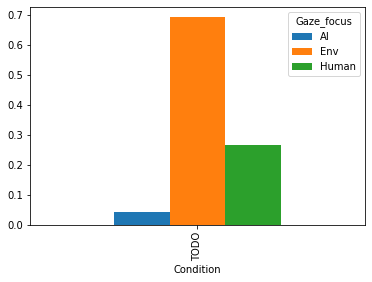

In [222]:
# plot that data for a single sample
data["P09"]["stats"]["overall"].plot(kind="bar")

In [223]:
# plot that data averaged over all
list_of_stats=[]
for p in data:
    list_of_stats.append(data[p]["stats"]["overall"])
list_of_stats

[Gaze_focus        AI      Env     Human
 Condition                              
 TODO        0.042178  0.74154  0.216282,
 Gaze_focus        AI       Env     Human
 Condition                               
 TODO        0.052364  0.831723  0.115913,
 Gaze_focus       AI       Env     Human
 Condition                              
 TODO        0.04533  0.581103  0.373566,
 Gaze_focus        AI       Env     Human
 Condition                               
 TODO        0.032305  0.885728  0.081967,
 Gaze_focus        AI       Env     Human
 Condition                               
 TODO        0.023268  0.654085  0.322647,
 Gaze_focus        AI       Env     Human
 Condition                               
 TODO        0.022472  0.893014  0.084514,
 Gaze_focus        AI       Env     Human
 Condition                               
 TODO        0.048181  0.679735  0.272083,
 Gaze_focus        AI       Env     Human
 Condition                               
 TODO        0.032427  0.819266  

In [225]:
stats_overall_concat=pd.concat(list_of_stats)
stats_overall_concat

Gaze_focus,AI,Env,Human
Condition,,,
TODO,0.042178,0.741540,0.216282
TODO,0.052364,0.831723,0.115913
TODO,0.045330,0.581103,0.373566
TODO,0.032305,0.885728,0.081967
TODO,0.023268,0.654085,0.322647
TODO,0.022472,0.893014,0.084514
TODO,0.048181,0.679735,0.272083
TODO,0.032427,0.819266,0.148307
TODO,0.041076,0.692910,0.266015


In [226]:
by_row_index = stats_overall_concat.groupby(stats_overall_concat.index)
df_means_overall = by_row_index.mean()
df_std_overall = by_row_index.std()
print(df_means_overall)
print(df_std_overall)

Gaze_focus       AI       Env     Human
Condition                              
TODO        0.04819  0.722956  0.228854
Gaze_focus        AI       Env     Human
Condition                               
TODO        0.023083  0.117572  0.110479


<AxesSubplot:xlabel='Condition'>

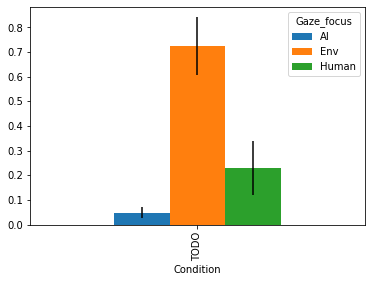

In [227]:
# plot averaged for all participants
df_means_overall.plot(kind="bar", yerr=df_std_overall)

In [ ]:
# plot that data averaged over lvl1 

In [ ]:
# plot that data averaged over lvl2 

# Export for SPSS



In [171]:
participants=[]
workflow_ai=[]
workflow_human=[]
workflow_env=[]
conf_ai=[]
conf_human=[]
conf_env=[]
err_ai=[]
err_human=[]
err_env=[]

In [184]:
data["P04"]["stats"]["overall"]

Gaze_focus,AI,Env,Human
Condition,,,
TODO,0.030594,0.882867,0.086538


In [183]:
data["P04"]["stats"]["overall"]["AI"]["TODO"]

0.030594405594405596

In [185]:
for p in data:
    participants.append(p)
    stats_overall=data["P04"]["stats"]["overall"]
    
    workflow_ai.append(stats_overall["AI"]["Normal"])
    workflow_human.append(stats_overall["Human"]["Normal"])
    workflow_env.append(stats_overall["Env"]["Normal"])
    
    conf_ai.append(stats_overall["AI"]["Confusion"])
    conf_human.append(stats_overall["Human"]["Confusion"])
    conf_env.append(stats_overall["Env"]["Confusion"])
    
    err_ai.append(stats_overall["AI"]["Error"])
    err_human.append(stats_overall["Human"]["Error"])
    err_env.append(stats_overall["Env"]["Error"])
    

KeyError: 'Normal'

In [177]:
# export collected data to csv for analysis in spss
spss_data = {'participant_id': participants, 
             'Workflow_AI': workflow_ai, 'Workflow_Human': workflow_human, 'Workflow_Env': workflow_env, 
             'Conf_AI': conf_ai, 'Conf_Human': conf_human, 'Conf_Env': conf_env,
             'Err_AI': err_ai, 'Err_Human': err_human, 'Err_Env': err_env,}
spss_df = pd.DataFrame(data=spss_data)
#spss_df.to_csv(index=False, "data_for_spss")

In [178]:
spss_df

,participant_id,Workflow_AI,Workflow_Human,Workflow_Env,Conf_AI,Conf_Human,Conf_Env,Err_AI,Err_Human,Err_Env


# Old test

In [32]:
test=data["P02"]["001"]

In [52]:
test["Condition"][0:30]="Confusion"

<ipython-input-52-dcbf52a0e5a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Condition"][0:30]="Confusion"


In [53]:
test.head()

,Unnamed: 0,norm_pos_x,norm_pos_y,Human x,Human y,Agent x,Agent y,Frame number,gaze_to_human,gaze_to_ai,Gaze_focus,Condition
0,0,579.062810,299.030757,624.5,365,481.0,222,0,80.102929,124.699849,Env,Confusion
1,1,577.224428,339.964374,624.0,364,480.5,220,1,52.589594,154.100831,Env,Confusion
2,2,600.289828,403.841444,624.5,364,482.0,220,2,46.620522,218.609606,Env,Confusion
3,3,600.842422,403.534150,624.5,364,482.0,220,3,46.072009,218.651105,Env,Confusion
4,4,590.888894,407.877364,624.5,364,482.0,220,4,55.271417,217.151318,Env,Confusion


In [57]:
test.groupby("Condition")["Gaze_focus"].value_counts()

Condition  Gaze_focus
Confusion  Env            22
           Human           7
           AI              1
TODO       Env           909
           AI             74
Name: Gaze_focus, dtype: int64

In [87]:
test.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)


Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.033333,0.733333,0.233333
TODO,0.075280,0.924720,0.000000


<AxesSubplot:xlabel='Condition'>

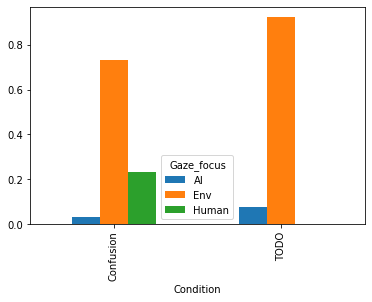

In [188]:
test.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().plot(kind="bar")

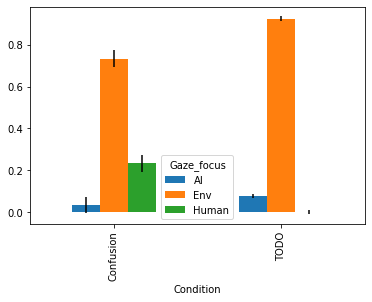

In [203]:
a = test.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().plot(kind="bar", yerr=[0.04,0.01])